<a href="https://colab.research.google.com/github/IEEE-BITS-Pilani-Student-Chapter/ML_Codeathon/blob/main/ML_Codeathon_APOGEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Codeathon, IEEE BITS Pilani, APOGEE 2022**

<p>
Birla Institute of Technology and Science (BITS), Pilani, is back to you with its 40th international annual technical festival, <b>APOGEE 2022 - The Encrypted Dimension</b>.
</p>
<p>
This <b>APOGEE, IEEE BITS Pilani</b>, brings to you, <b>ML Codeathon</b>. This time we have something for everyone - a challenge for beginners as well as experts. 


## Submissions:
You need to submit:
1. Python notebook (`.ipynb`) file with outputs
<br>
2. Saved models (`.pt`) file
<br>
3. `submission.json` file


## Problem Statement
You have been given the data.zip file, which contains images from different classes. Your task is to propose a model that accurately classifies the images into their respective classes. Note that your submission will be evaluated based upon the train test accuracy, number of parameters, computational time on the same machine, number of flops, among other evaluation criteria. It is mandatory to submit all files for evaluation, which have been mentioned above.
<hr>

## Sample Code

Here's a sample code to help introduce beginners to Pytorch, a state-of-the-art Deep Learning Library in Python. You are however free to use any open-source Deep Learning library you are comfortable with, as long as you abide by the rules and submission criteria.

###Imports

First we need to **import the necessary libraries**. <br>
Torch is the library we are using for Deep Learning. <br>
Torchvision is the library used for visual data.

As we are working in Google Colab, we need to install the required libraries before importing them

In [1]:
!pip install pthflops

  Created wheel for pthflops: filename=pthflops-0.4.1-py3-none-any.whl size=10063 sha256=148fa7e5b88b8f6397e2cf0d7e933f099ad37b0be75b6b20e14234b5a091654e
  Stored in directory: /root/.cache/pip/wheels/9c/41/05/475bdaebaaf3a44f25367a8dc0ac9d4b8edbb7f5fa19724c70
Successfully built pthflops


In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torch import optim
from torchsummary import summary
from pthflops import count_ops
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np

The snippet below loads the dataset in the form of numpy array data. <br>
`dataset['a']` can be used to access the training image data as a numpy array of shape (64000, 3, 64, 64) - It contains 64000 images each of 3 channel 64 x 64 resolution, of a total of 20 classes. <br>
`dataset['b']` can be used to access the training data labels of shape (64000,) - It contains 64000 labels, for a total of 20 classes, distributed equally.

In [3]:
import urllib.request
urllib.request.urlretrieve('https://www.dropbox.com/s/tttu6a2iftfhjqm/Apogee_test_dataset.npz?dl=1', 'Apogee_test_dataset.npz')
urllib.request.urlretrieve('https://www.dropbox.com/s/pmpl88pa18xhatz/Apogee_train_dataset.npz?dl=1', 'Apogee_train_dataset.npz')

('Apogee_train_dataset.npz', <http.client.HTTPMessage at 0x7f6078af3690>)

In [4]:
!pwd

/content


You can use any method to get the dataset.
The Dataset is downloadable from https://drive.google.com/drive/folders/1ZSjgxPUgLg86IC9LYANvcgtdWQTr3mwt?usp=sharing
<br>
Here, we show the code to download it from the git repo 
in the colab session's storage:

In [5]:
'''
You can use any method to get the dataset.
Here, we show the code to download it from the git repo 
in the colab session's storage
'''

train_dataset = np.load('./Apogee_train_dataset.npz', allow_pickle=True)
test_dataset = np.load('./Apogee_test_dataset.npz', allow_pickle=True)

In [6]:
from torch.utils.data import TensorDataset, DataLoader
train = TensorDataset(torch.as_tensor(train_dataset['a']), torch.as_tensor(train_dataset['b']))
test = TensorDataset(torch.as_tensor(test_dataset['a']), torch.as_tensor(test_dataset['b']))

###Neural Network model











We are now defining the Neural Network. <br>
Within it we will define all the different layers.
<br>
We use the variable `c1` and `c2` to define our convolution layers, `act` for our activation function- ReLU, and `l1` for our Fully connected layer

<font color="red"><b>Only the model1 below will be used for evaluation, and NOT model2</b></font>

In [7]:
class NeuralNetwork1(nn.Module):
    def __init__(self):
        super(NeuralNetwork1,self).__init__()
        self.c1=nn.Conv2d(3, 24, 3, 2) 
        self.c2=nn.Conv2d(24, 48, 3, 2) 
        self.act=nn.ReLU()
        self.flatten= nn.Flatten(start_dim=1)
        self.l1=nn.Linear(in_features=10800,out_features=20)
    def forward(self,x):
        x=self.c1(x)
        x=self.act(x)
        x=self.c2(x)
        x=self.act(x)
        x=self.flatten(x)
        x=self.l1(x)
        x=self.act(x)
        x=nn.functional.softmax(x,dim=1)
        return x

Now we define another model this time just using Fully Connected Layers

In [8]:
class NeuralNetwork2(nn.Module):
    def __init__(self):
        super(NeuralNetwork2,self).__init__()
        self.l1=nn.Linear(in_features=64*64*3,out_features=200)
        self.flatten= nn.Flatten(start_dim=1)
        self.l2=nn.Linear(in_features=200,out_features=20)
        self.relu = nn.ReLU()
    def forward(self,x):
        x=self.flatten(x)
        x=self.relu(self.l1(x))
        x=self.l2(x)
        x=nn.functional.softmax(self.relu(x),dim=1)
        return x

###Training on GPU

Deep learning takes a lot of time on the CPU. Therefore we use cuda (GPU) for the training process. <br>
Make sure your colab session is connected to a GPU (from Runtime -> Manage sessions)

In [9]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


We now make a model of our defined neural network and define the learning rate.

In [10]:
model1=NeuralNetwork1().to(device)
model2=NeuralNetwork2().to(device)
learning_rate=0.001

We use the summary function to find out the total number of parameters used by our neural network



In [11]:
tot_params = summary(model1, input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 24, 31, 31]             672
              ReLU-2           [-1, 24, 31, 31]               0
            Conv2d-3           [-1, 48, 15, 15]          10,416
              ReLU-4           [-1, 48, 15, 15]               0
           Flatten-5                [-1, 10800]               0
            Linear-6                   [-1, 20]         216,020
              ReLU-7                   [-1, 20]               0
Total params: 227,108
Trainable params: 227,108
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 0.60
Params size (MB): 0.87
Estimated Total Size (MB): 1.51
----------------------------------------------------------------


In [13]:
summary(model2,input_size=(3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                [-1, 12288]               0
            Linear-2                  [-1, 200]       2,457,800
              ReLU-3                  [-1, 200]               0
            Linear-4                   [-1, 20]           4,020
              ReLU-5                   [-1, 20]               0
Total params: 2,461,820
Trainable params: 2,461,820
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 0.10
Params size (MB): 9.39
Estimated Total Size (MB): 9.54
----------------------------------------------------------------


We define our loss to be calculated as Cross Entropy and use SGD (Stochastic Gradient Descent) as our optimizer



In [14]:
loss_fun1=nn.CrossEntropyLoss()
optimiser1=torch.optim.SGD(model1.parameters(),lr=learning_rate)
loss_fun2=nn.CrossEntropyLoss()
optimiser2=torch.optim.SGD(model2.parameters(),lr=learning_rate)

We define a function to check the accuracy of our model on given data



###Accuracy

In [15]:
def accuracy_check(loader,model):
    correct=0
    total=0
    model.eval()
    with torch.no_grad():
        for (x,y) in (loader):
            x=x.float().to(device=device)
            y=y.to(device=device)
            scores=model(x)
            _,predictions=scores.max(1)
            correct+=(predictions==y).sum()
            total+= predictions.size(0)
            model.train()
    return float(correct/total)

In [16]:
def plot(epochs,loss):
    plt.xlabel("epoches")
    plt.ylabel("loss")
    plt.plot(epochs,loss)

In [17]:
model1.to(device)

NeuralNetwork1(
  (c1): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2))
  (c2): Conv2d(24, 48, kernel_size=(3, 3), stride=(2, 2))
  (act): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=10800, out_features=20, bias=True)
)

In [18]:
trainLoader = DataLoader(train, batch_size=512, shuffle = True)
testLoader = DataLoader(test, batch_size=512, shuffle=True)

**Training**:
<br>
Now we run our training loop in which we predict the score for given input and then finds the loss and then use backward propagation to change our parameters using the optimizer in order to lower our loss.

<font color="red"><b>Change the model1 below, as the changes will be auto-tracked for evaluation only for model1, and NOT model2</b></font>

  0%|          | 0/5 [00:00<?, ?epoch/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

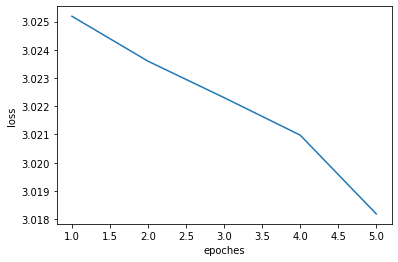

In [19]:
loss_vals1=[]
epochs=5
for epoch in tqdm(range(epochs), total=epochs, unit='epoch'):
    epoch_loss=[]
    for i,(data,target) in tqdm(enumerate(trainLoader)):
        
        data = data.float()
        target = target.float().type(torch.LongTensor)

        data, target = data.to(device), target.to(device)
        scores=model1(data)
        # print(scores.shape)
        # print(target.shape)
        loss=loss_fun1(scores,target)
        optimiser1.zero_grad()
        loss.backward()
        epoch_loss.append(loss.item())
        optimiser1.step()
    loss_vals1.append(sum(epoch_loss)/len(epoch_loss))
plot(np.linspace(1,5,5).astype(int),loss_vals1)

'''
You are required to save a .pt file, which has to be submitted
'''

torch.save(model1, 'model1_checkpoint.pt')        

  0%|          | 0/5 [00:00<?, ?epoch/s]

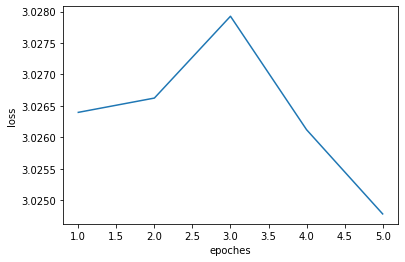

In [20]:
loss_vals2=[]
epochs=5
for epoch in tqdm(range(epochs), total=epochs, unit='epoch'):
    epoch_loss=[]
    for i,(data,target) in enumerate(trainLoader):
        data = data.float()
        target = target.float().type(torch.LongTensor)
        data=data.to(device)
        target=target.to(device)
        scores=model2(data)
        loss=loss_fun2(scores,target)
        optimiser2.zero_grad()
        loss.backward()
        epoch_loss.append(loss.item())
        optimiser2.step()
    loss_vals2.append(sum(epoch_loss)/len(epoch_loss))
plot(np.linspace(1,5,5).astype(int),loss_vals2)

torch.save(model2, 'model2_checkpoint.pt') 

###Submissions

We use these commands to find the number of Floating point operations in the training data

In [21]:
(datac,labelc) = next(iter(DataLoader(train, 2)))
datac = datac.float()
floating_pt_ops = count_ops(model1.to("cpu"),datac)
print(floating_pt_ops)

OperationOPS       
------  --------  
c1      1291584   
act     92256     
c2      4687200   
act_1   43200     
l1      432020    
act_2   80        
-----   -------   
Input size: (2, 3, 64, 64)
6,546,340 FLOPs or approx. 0.01 GFLOPs
(6546340, [['c1', 1291584], ['act', 92256], ['c2', 4687200], ['act_1', 43200], ['l1', 432020], ['act_2', 80]])


In [22]:
train_accuracy1=accuracy_check(trainLoader,model1.to(device))
train_accuracy2=accuracy_check(trainLoader,model2.to(device))

test_accuracy1=accuracy_check(testLoader,model1.to(device))
test_accuracy2=accuracy_check(testLoader,model2.to(device))

<font color="red"><b>All participants must ensure that the format of the `.json` file, to be submitted, must be the same as below.</b></font>

In [24]:
import json

dictionary ={
    "FLOPS" : floating_pt_ops,
    "training_accuracy" : train_accuracy1,
    "testing_accuracy" : test_accuracy1,
    "loss" : loss_vals1[-1]
}
  
# Serializing json 
json_object = json.dumps(dictionary, indent = 4)
  
# Writing to sample.json
with open("submissions.json", "w") as outfile:
    outfile.write(json_object)